In [1]:
import math
import pandas as pd
import numpy as np

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', -1)

import matplotlib.pyplot as plt

In [2]:
deliveries = pd.read_csv('deliveries_updated_mens_ipl.csv')
matches = pd.read_csv('matches_updated_mens_ipl.csv')

In [3]:
df = deliveries.copy()

In [5]:
df.head(5)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
def ByInnings(df,current_innings):

    df = df[df.inning == current_innings]
    df.reset_index(inplace = True, drop = True)
    
    df['isDot'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)
    
    runs = pd.DataFrame(df.groupby(['batsman'])['batsman_runs'].sum()).reset_index().rename(columns = {'batsman_runs':'Runs'})
    balls = pd.DataFrame(df.groupby(['batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId' : 'Balls'})
    innings = pd.DataFrame(df.groupby(['batsman'])['matchId'].apply(lambda x : len(list(np.unique(x))))).reset_index().rename(columns = {'matchId' : 'Innings'})
    dismissals = pd.DataFrame(df.groupby(['batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed' : 'Dismissals'})
    fours = pd.DataFrame(df.groupby(['batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour' : 'Fours'})
    sixes = pd.DataFrame(df.groupby(['batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix' : 'Sixes'})
    
    df = pd.merge(innings,runs, on ='batsman').merge(balls,on='batsman').merge(dismissals,on='batsman').merge(fours,on='batsman').merge(sixes,on='batsman')
    
    df['RPI'] = df.apply(lambda x : (x['Runs']/x['Innings']), axis = 1)
    
    return df

In [21]:
Inn1_df = ByInnings(df, 1)
Inn2_df = ByInnings(df, 2)

In [20]:
Inn1_df.head()

,batsman,Innings,Runs,Balls,Dismissals,Fours,Sixes,RPI
0,A Ashish Reddy,13,166,115,7,6,10,12.769231
1,A Badoni,5,106,89,5,7,4,21.200000
2,A Chandila,2,4,7,1,0,0,2.000000
3,A Chopra,5,51,72,4,7,0,10.200000
4,A Choudhary,1,15,12,0,1,0,15.000000


In [27]:
Inn1_df = Inn1_df[['batsman','RPI']].rename(columns = {'RPI' : 'RPI1'})

In [28]:
Inn2_df = Inn2_df[['batsman','RPI']].rename(columns = {'RPI' : 'RPI2'})

In [29]:
Inn1_df.head()

,batsman,RPI1
0,A Ashish Reddy,12.769231
1,A Badoni,21.200000
2,A Chandila,2.000000
3,A Chopra,10.200000
4,A Choudhary,15.000000


In [30]:
df1 = pd.merge(Inn1_df, Inn2_df, on ='batsman')

In [37]:
df1 = df1[(df1.RPI1 > 25) & (df1.RPI2 > 25)]

In [43]:
df1.reset_index(drop = True).head()

,batsman,RPI1,RPI2
0,AK Markram,29.600000,29.153846
1,AM Rahane,28.324324,26.729730
2,CA Lynn,32.578947,30.869565
3,CH Gayle,37.802632,32.184615
4,D Padikkal,28.516129,25.066667


In [46]:
len(df1)

33

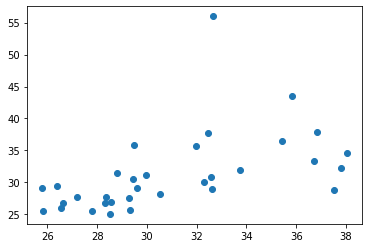

In [45]:
plt.scatter(df1['RPI1'],df1['RPI2'])
plt.show()